In [1]:
import numpy as np


In [3]:
J = np.empty([3,2], dtype = int)
print (J)

[[50711904        0]
 [       0        0]
 [       0        0]]


In [4]:
J = np.array([[1,1],[1,-1]])
print(J)

[[ 1  1]
 [ 1 -1]]


In [17]:
a = np.array([1,2])
b = np.array([[1,2],[3,4]])
a@b@a


27

In [2]:
def load_data():
    file = open('./data/G2', 'r')
    for (idx, line) in enumerate(file):
        if idx == 0:
            N = int(line.split(' ')[0])
            J = np.empty([N,N], dtype=np.double)
        else:
            J[int(line.split(' ')[1])-1][int(line.split(' ')[1])-1] = (line.split(' ')[2])

    file.close()
    tor_arr = torch.from_numpy(-J)
    return tor_arr

In [13]:
import math
import torch
import numpy as np
def dSB(J, init_x, init_y, num_iters, dt):
    N = J.shape[0]
    x_comp = init_x.clone()  # position
    y_comp = init_y.clone()  # momentum
    # xi = 0.5 / J.square().sum().div_(N - 1).sqrt_()
    xi = 0.7 / math.sqrt(N)

    alpha = torch.linspace(0, 1, num_iters)  # alpha
    sol = x_comp.sign()
    energies = []
    e = - 1 / 2 * sol.T@ J @ sol
    energies.append(e)

    for i in range(num_iters):
        # bsb

        y_comp += ((-1 + alpha[i]) * x_comp + xi * (J @ x_comp)) * dt  # update the momentum
        x_comp += y_comp * dt  # update the x position part
        # print(x_comp)
        y_comp[x_comp.abs() > 1] = 0.
        x_comp.clamp_(-1, 1)

        sol = x_comp.sign()
        e = - 1 / 2 * sol.T @ J @ sol  #
        energies.append(e)

    return energies

J = load_data()
# J = torch.from_numpy(np.array([[0.,-1.],[-1., 0.]]))
init_x = torch.from_numpy(np.random.uniform(-0.1,0.1,J.shape[0]))
init_y = torch.from_numpy(np.random.uniform(-0.1,0.1,J.shape[0]))
energies = np.array(dSB(J,init_x,init_y,1000,0.25))
print(energies)
        # # dsb
        # # y_comp += ((-1 + alpha[i]) * x_comp + xi * (J @ x_comp.sign())) * dt
        # # x_comp += y_comp * dt
        # # y_comp[x_comp.abs() > 1] = 0.
        # # x_comp.clamp_(-1, 1)
        #
        # # SB
        # # y_comp += xi * (J @ x_comp) * dt # y momentum
        # # for j in range(M):
        # #     y_comp += ((-1 + alpha[i]) * x_comp - x_comp ** 3) * dt / M # alpha equals to alpha
        # #     x_comp += y_comp * dt / M #
        #
        # sol = x_comp.sign()
        # e = - 1 / 2 * sol.permute(0) @ J @ sol  #
        # energies.append(e)

    # return energies

[ 343.06776201  384.43194361  388.51025223 ...  -99.52902241  -94.65784164
 -105.72219443]


In [83]:
    import numpy as np
    import torch
    import math
    # J = load_data()
    J = torch.from_numpy(np.array([[0.,-1.],[-1., 0.]]))
    init_x = torch.from_numpy(np.random.uniform(-0.1,0.1,J.shape[0]))
    init_y = torch.from_numpy(np.random.uniform(-0.1,0.1,J.shape[0]))


In [90]:
energies = np.array(dSB(J,init_x,init_y,100,0.25))
print(energies)
# print(J.shape)

[-1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

<Figure size 600x600 with 0 Axes>

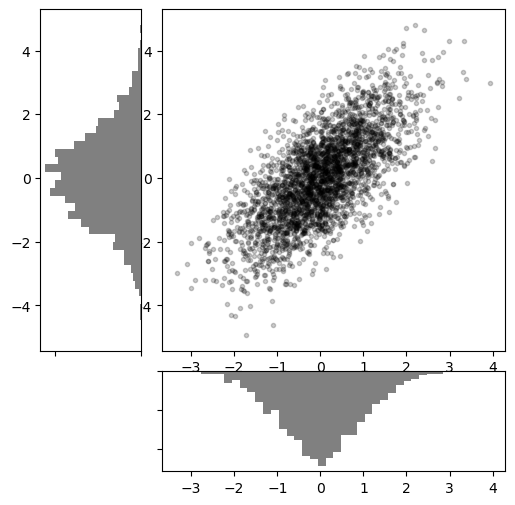

In [13]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[0:3, 1:])
y_hist = fig.add_subplot(grid[:3, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[3, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

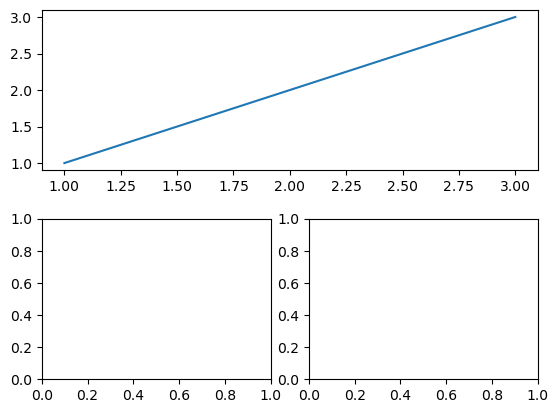

In [24]:
data=numpy.random.choice([2,3,4,5,6,7],3,False,(0.1,0.2,0.3,0.4,0,0))

In [35]:
import numpy as np
data=np.random.choice([0,1],(2,2),True,(0.1,0.9))
print(data)

[[1 1]
 [1 1]]
